In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import math

files = ["pureSM.csv","T0_1em12_pureAQGC.csv","M0_pureaqgc.csv","M1_pureaqgc.csv","M7_pureaqgc.csv","S0_pureaqgc.csv","S1_pureaqgc.csv"]

In [16]:
#identifying columns
cols = []
allcols = pd.read_csv(files[0], delimiter=" ").columns
name = allcols[1]
index = 1
while name != "w_Default":
    cols.append(name)
    name = allcols[index]
    index+=1

In [12]:
def calcAvg(file, col):
    data_temp = pd.read_csv(file, delimiter=" ")
    data = data_temp.dropna()
    info_temp = data[col]
    info = info_temp.drop(info_temp.index[info_temp.size-1])
    avg = round(info.mean(),3)
    return avg

In [13]:
def graphError(info, shade):
    vals_normalized = np.histogram(info, bins=25,  density = True)
    y_temp,bins = vals_normalized
    
    vals = np.histogram(info, bins=25)
    notNormy_temp, _ = vals
    
    x_temp = (bins[:-1] + bins[1:]) / 2
    y = []
    x = []
    notNormy = []
    for i, val in enumerate(y_temp):
        if val != 0:
            y.append(val)
            x.append(x_temp[i])
            notNormy.append(notNormy_temp[i])
    
    norm_errors = np.sqrt(notNormy)
    relErrors = np.divide(norm_errors,notNormy, out=np.zeros_like(norm_errors),where=notNormy!=0) 
    errors =  y * relErrors
    
    plt.errorbar(x, y, yerr=errors, fmt=".", color = shade)

def graphFiles(files, column):
    for file in files:
        #clean-up
        data_temp = pd.read_csv(file, delimiter=" ")
        data = data_temp.dropna()
        info_temp = data[column]
        info = info_temp.drop(info_temp.index[info_temp.size-1])
        
        #plotting
        title = file.split(".")[0]
        avg = calcAvg(file, column)
        _, _, patches = plt.hist(info, bins=25, label=title+" w/ mean: "+ str(avg), density = True, alpha = 0.5)
        shade = patches[0].get_facecolor()
        graphError(info, shade)
        plt.xlabel(column)
    plt.ylabel('counts')
    plt.title('Overlayed Plots')
    plt.legend()
    plt.show()

In [22]:
#function to identify the operator that is most different to the SM
def maxValue(sm, operators, col):
    avgs = {}
    for operator in operators:
        avg = calcAvg(operator, col)
        name = operator[:2]
        avgs[name] = avg
    sm_avg = calcAvg(sm, col)
    
    max_dif = ("n/a",0)
    for each in avgs:
        dif = abs(sm_avg-avgs[each])
        if dif > max_dif[1]:
            max_dif = (each, dif)
    
    #return "Max Difference w/ SM: "+ max_dif[0] + "\nAll Avgs: "+str(avgs)
    return max_dif[0]

In [23]:
#testing
operators = files[1:]
sm = files[0]
col = "nmuon"
print("SM Avg: ", calcAvg(sm, col))
print(maxValue(sm, operators, col))

SM Avg:  1.528
S0


In [24]:
operators = files[1:]
sm = files[0]
for col in cols[2:]:
    ret = maxValue(sm, operators, col)
    print("Max Difference for", col, ":", ret)

Max Difference for l1Pt : T0
Max Difference for l1Eta : S0
Max Difference for l1Phi : S0
Max Difference for l1E : T0
Max Difference for l2Pt : M7
Max Difference for l2Eta : S0
Max Difference for l2Phi : S1
Max Difference for l2E : M7
Max Difference for l3Pt : M7
Max Difference for l3Eta : M7
Max Difference for l3Phi : T0
Max Difference for l3E : M7
Max Difference for mlll : M0
Max Difference for mll12 : M0
Max Difference for mll13 : M7
Max Difference for mll23 : M7
Max Difference for dPhiLeptonsMET : S0
Max Difference for mtLeptons : T0
Max Difference for mtl2 : T0
Max Difference for dRl1l2 : M0
Max Difference for dRl1l3 : T0
Max Difference for dRl2l3 : T0
Max Difference for dRllMin : M1
Max Difference for dRllMax : M1
Max Difference for dRllSum : T0
Max Difference for mllSF : M7
Max Difference for met : n/a
Max Difference for nJets : M0
Max Difference for totalQ : M7
Max Difference for lepflavor : S1
Max Difference for nmuon : S0
Max Difference for nelectron : S0


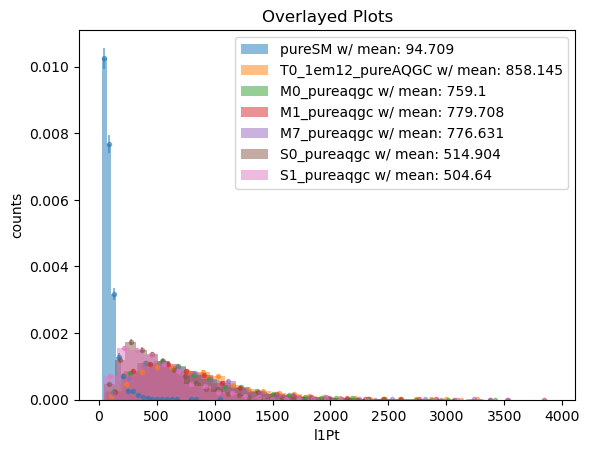

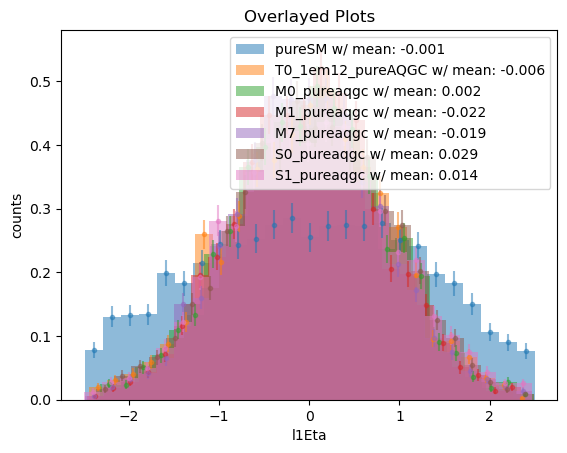

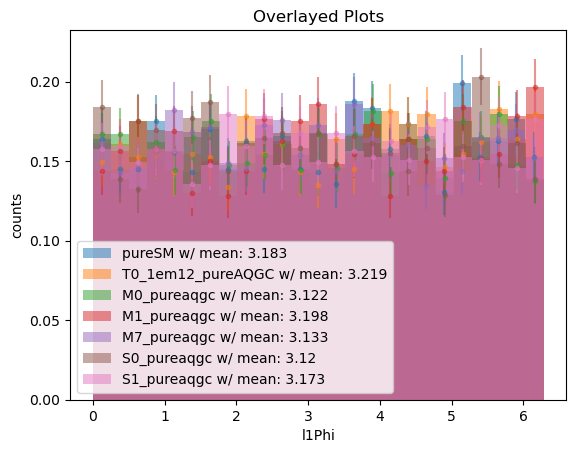

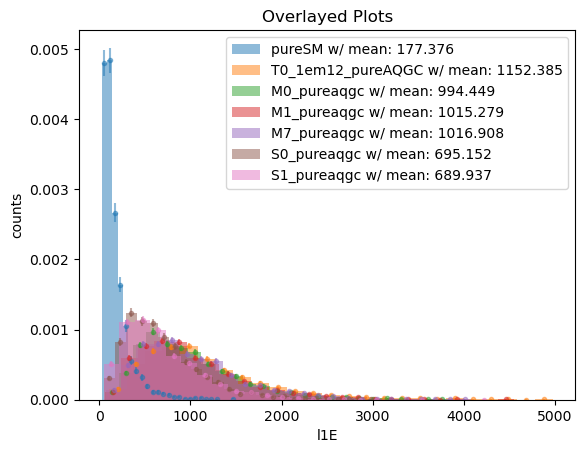

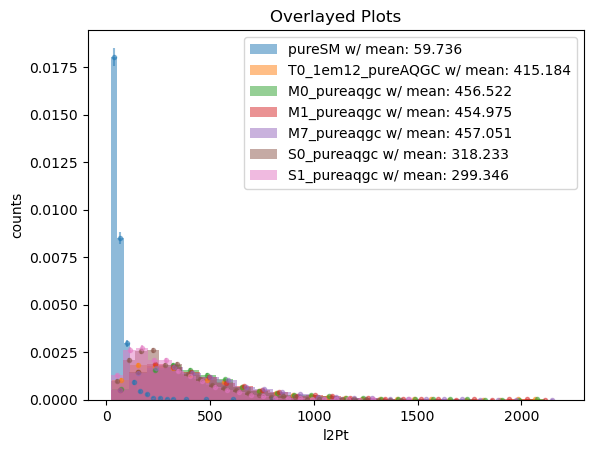

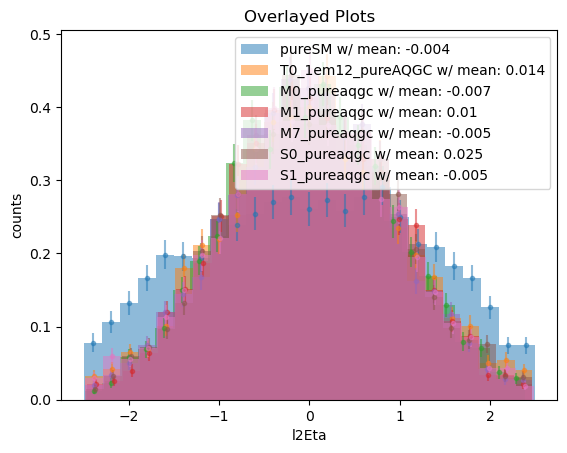

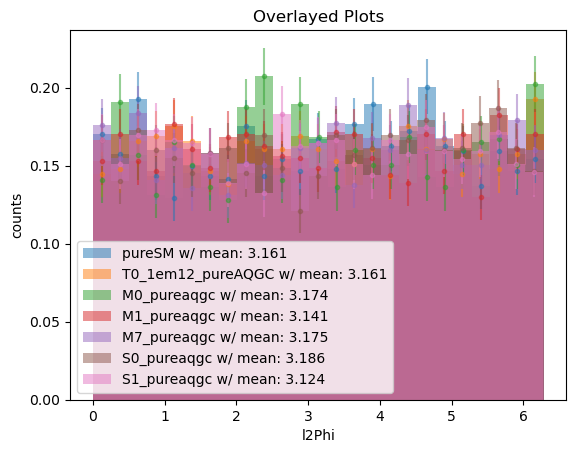

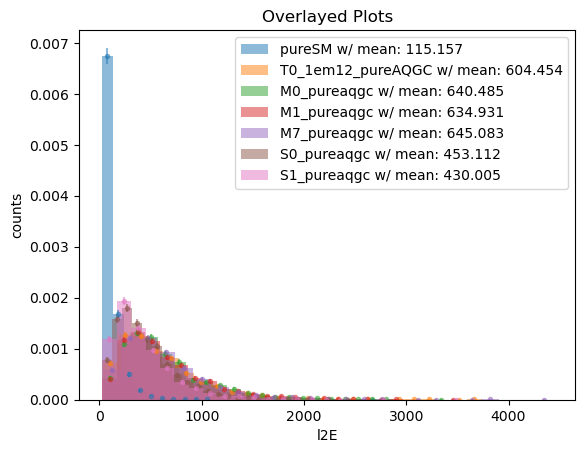

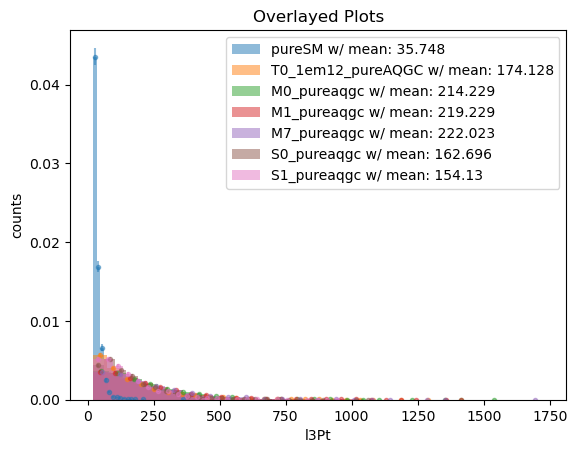

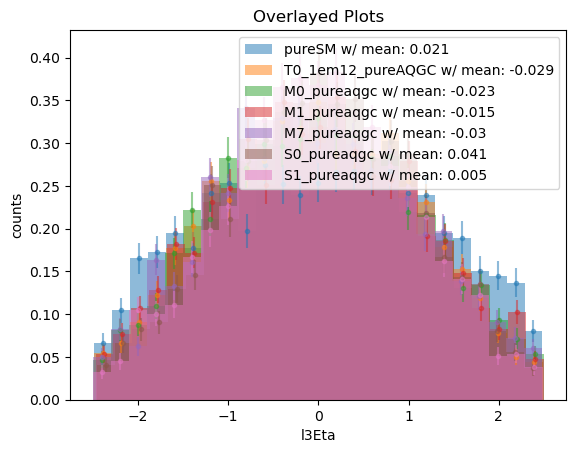

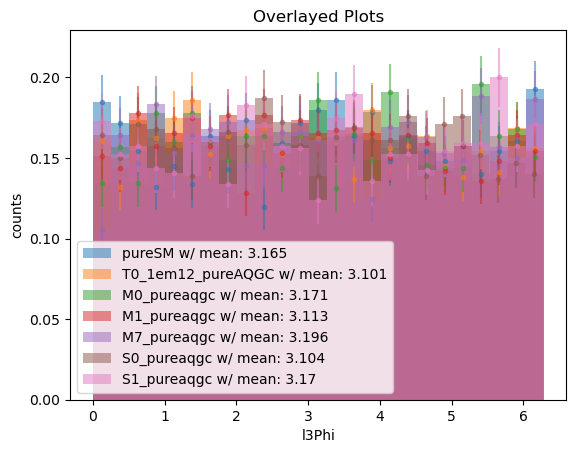

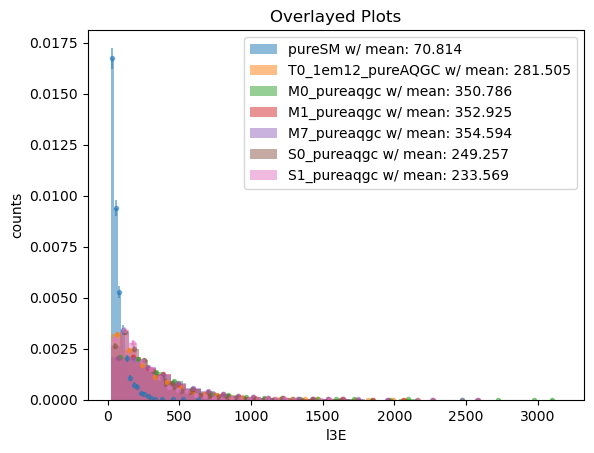

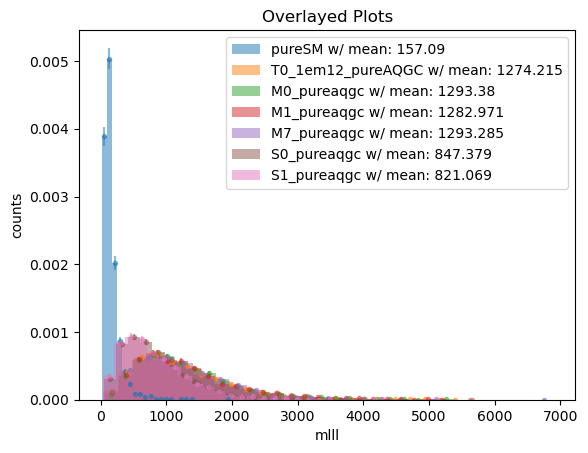

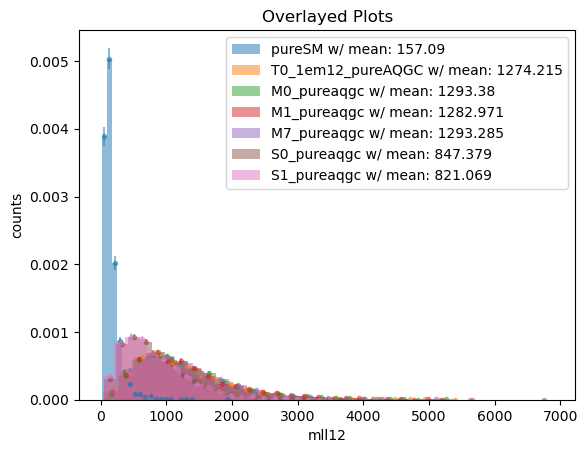

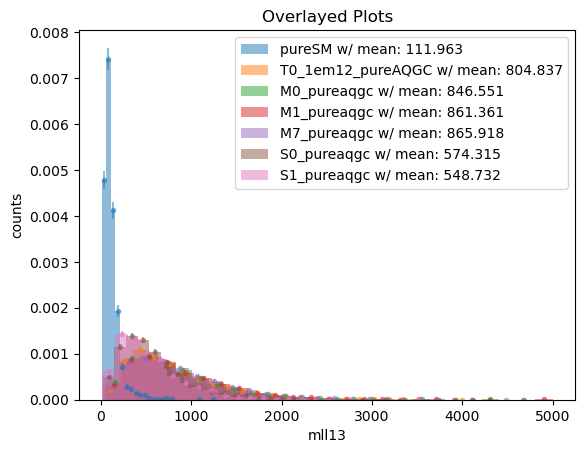

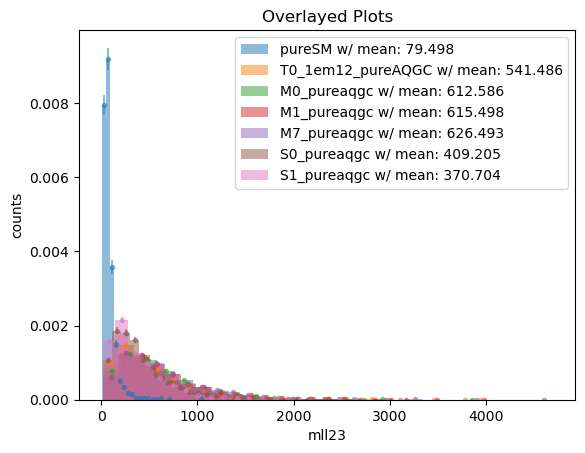

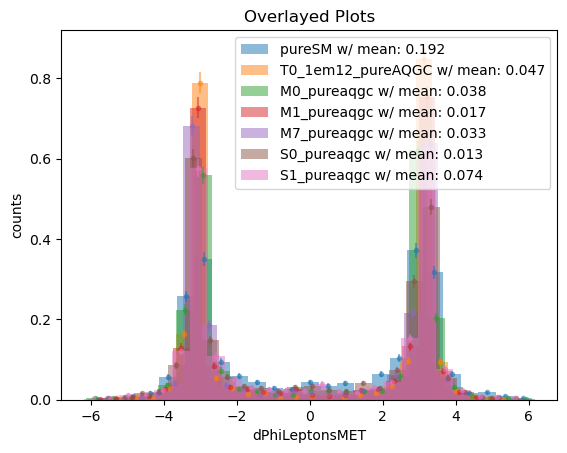

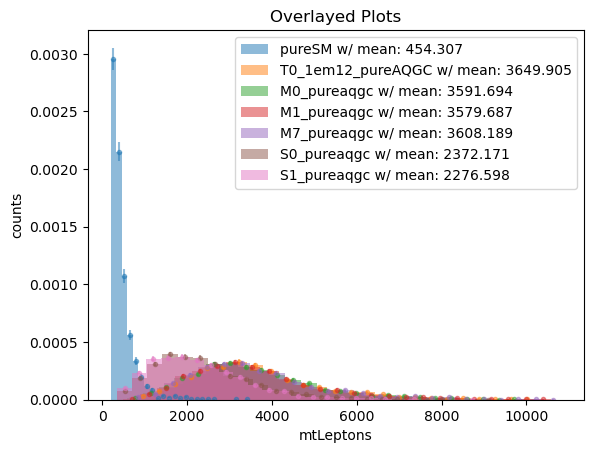

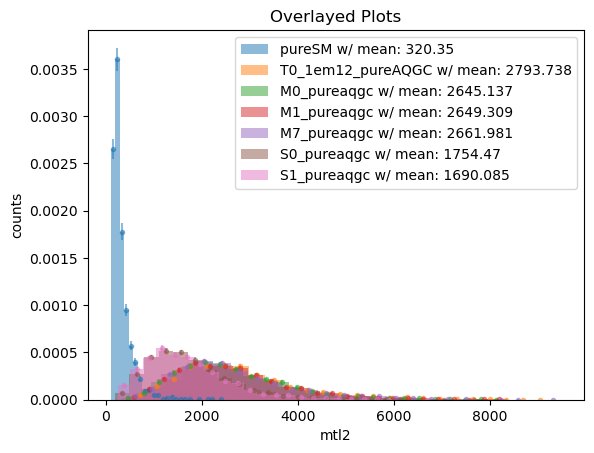

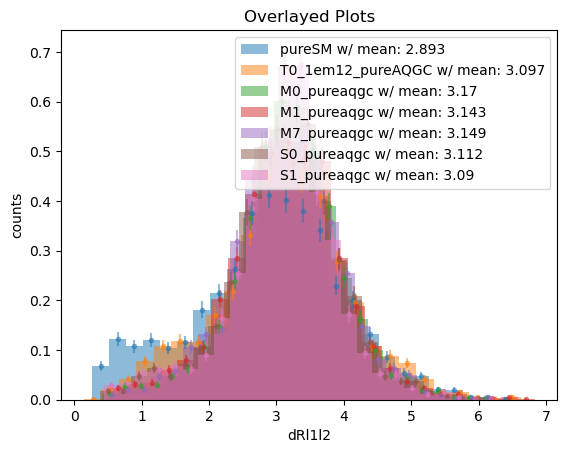

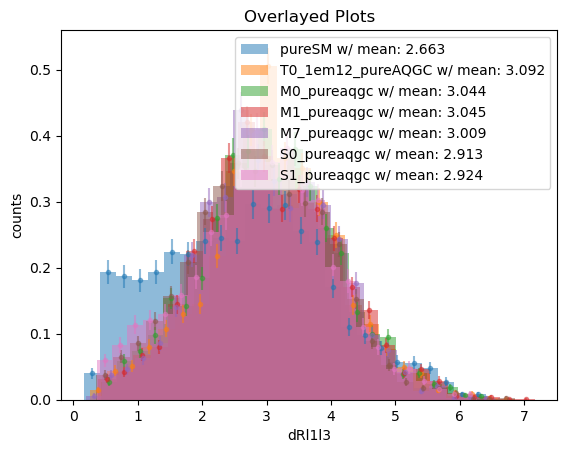

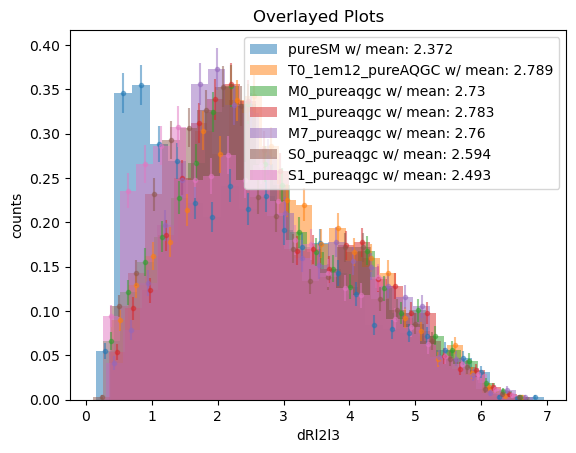

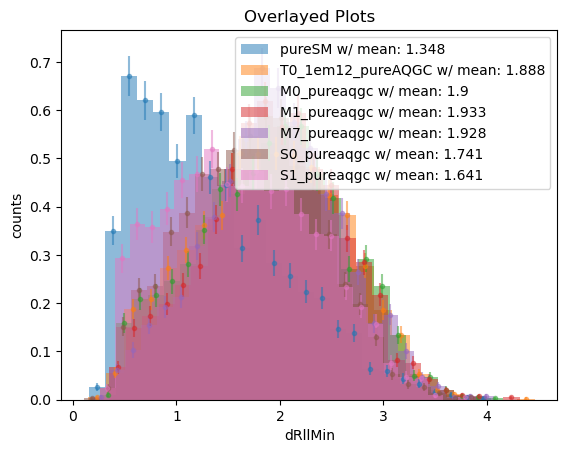

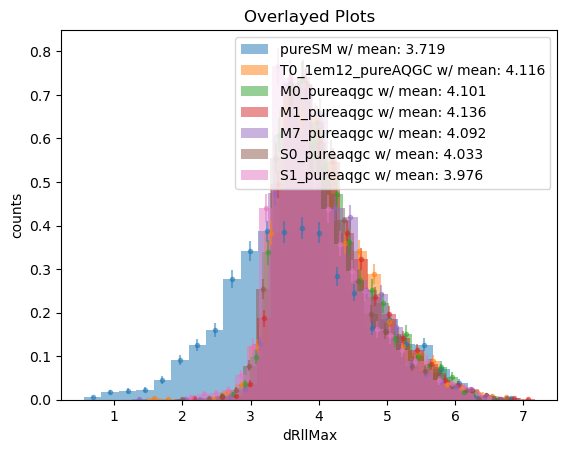

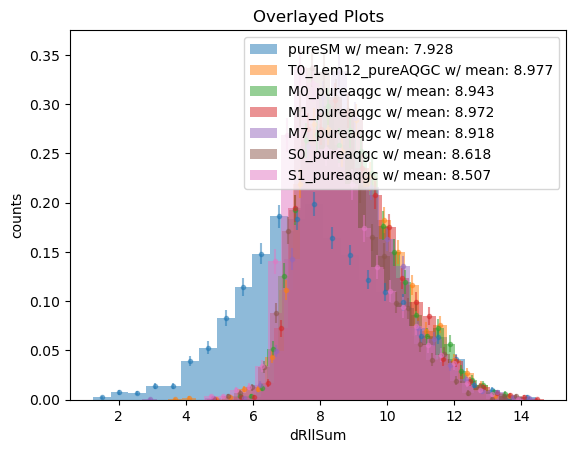

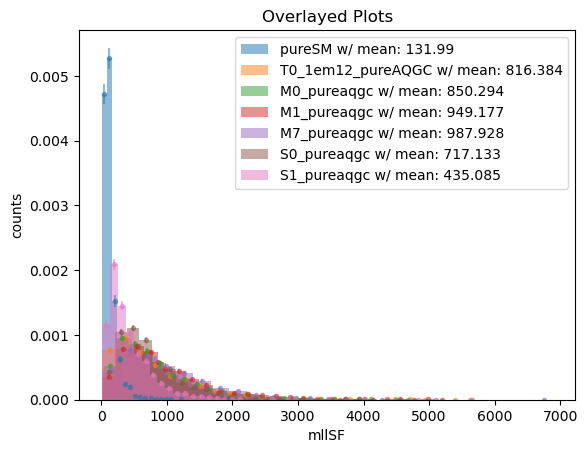

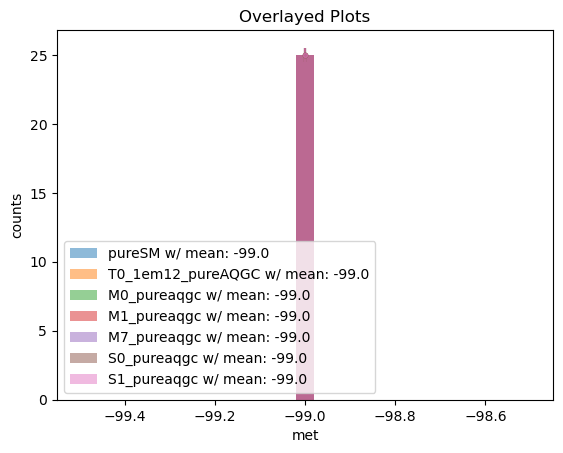

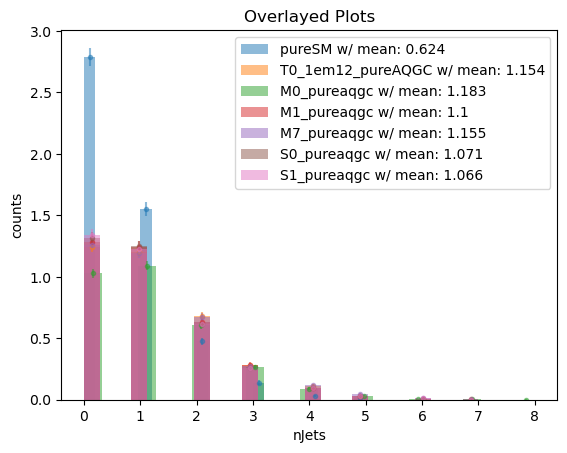

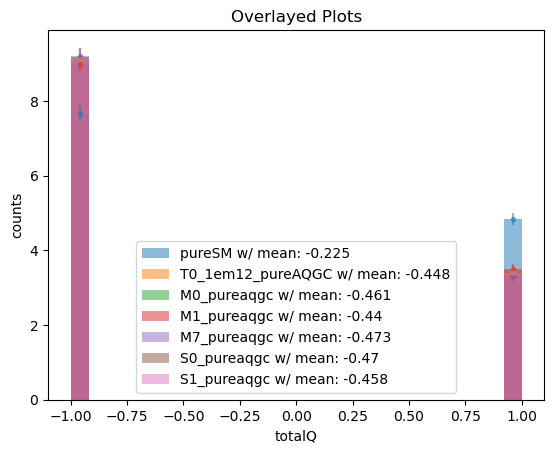

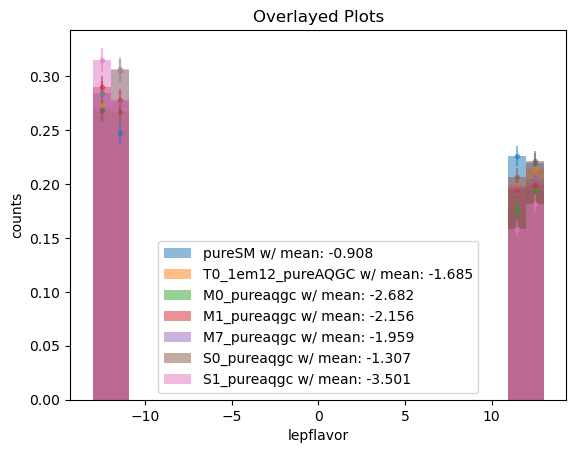

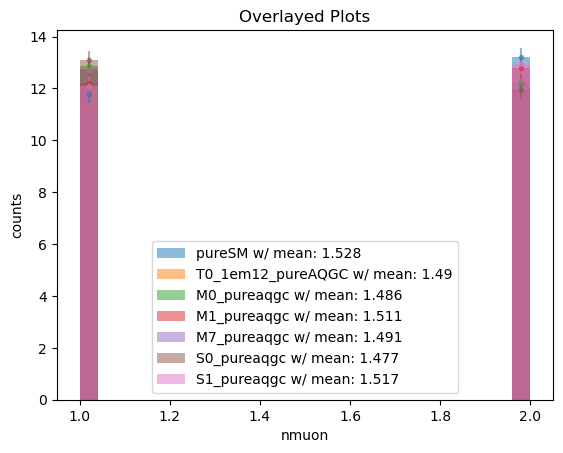

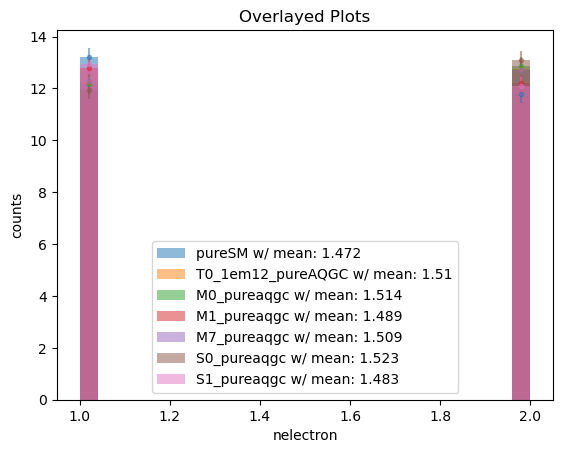

In [16]:
for col in cols[2:]:
    graphFiles(files, col)